In [81]:
import pandas as pd
import numpy as np

import json
import requests
import urllib.parse

import spotipy.util as util

import matplotlib.pyplot as plt
import seaborn as sns

import datetime

import PIL.Image
from pylab import *
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import markovify

In [82]:
client_id = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'         #<----------------- YOUR ID HERE
    
client_secret = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'       #<----------------- YOUR SECRET HERE

username = 'XXXXXXXXXX'                                #<----------------- YOUR USERNAME HERE

scope = 'playlist-modify-public playlist-modify'

redirect_uri = 'https://developer.spotify.com/dashboard/applications/0b03809ce8db4dd785536aad89af792b'

token = util.prompt_for_user_token(username=username, 
                                   scope=scope, 
                                   client_id=client_id,   
                                   client_secret=client_secret,     
                                   redirect_uri=redirect_uri)

# Search for All Podcasts Related to Data Science

In [83]:
# Search Spotify’s catalog for content: 

# The search API now returns podcast shows and episodes. 
# Set the type parameter to show or episode to query these new types of content.



# GET https://api.spotify.com/v1/search 



### Enter a term to search below

In [84]:
# enter term to search here

search = 'data science'

In [85]:
# search endpoint

endpoint_url = "https://api.spotify.com/v1/search?"


In [86]:
# PERFORM THE QUERY

id_list = []
name_list = []                                         # create empty lists to hold data
desc_list = []

type = 'show'    
market  = 'US'
limit = 50                                             # assign variables for search query
offset = 0                                             # start offset at 0


more_runs = 1                                          # instantiate conditional variables
counter = 0  

                                                            # max offset is 2000 including limit
while((offset <= 1950) & (counter <= more_runs)):           # while loop to run with conditional variables



    query = f'{endpoint_url}'
    query += f'&q={search}'
    query += f'&type={type}'
    query += f'&offset={offset}'                       # format search query with assigned variables
    query += f'&market={market}'
    query += f'&limit={limit}'


    response = requests.get(query,                                           # get request
                   headers={"Content-Type":"application/json", 
                            "Authorization":f"Bearer {token}"})  
    json_response = response.json()                                           # as a json file


    for i in range(len(json_response['shows']['items'])):                      # loop through json

        id_list.append(json_response['shows']['items'][i]['id'])               # pull out info from json
        name_list.append(json_response['shows']['items'][i]['name'])           # into empty lists
        desc_list.append(json_response['shows']['items'][i]['description'])
        
        
    more_runs = (json_response['shows']['total'] // 50 )            # how many more runs of 50 are needed?       
        
    counter += 1                                                    # increase conditional counter by 1
    
    offset = offset + 50                                            # increase offset by 50

                                                                    # rinse and repeat!

In [87]:
# set up a dataframe from the lists

podcasts = pd.DataFrame()

podcasts['id'] = id_list
podcasts['name'] = name_list
podcasts['description'] = desc_list

In [88]:
podcasts

,id,name,description
0,63diy2DtpHzQfeNVxAPZgU,Towards Data Science,"Sharing concepts, ideas, and codes"
1,1LaCr5TFAgYPK5qHjP3XDp,Practical AI: Machine Learning & Data Science,"Making artificial intelligence practical, prod..."
2,0kp4abozqxCmILx0lT9foc,The SCP Foundation Database,An immersive audio storytelling series from th...
3,5nrspdHxUxzc9TkEibpxD5,Data Science Now,Data Science Now is a podcast brought to you b...
4,71RbIpffwWXUMZQTFKiMWk,The Artists of Data Science,"In his book Linchpin, Seth Godin says that ""“A..."
...,...,...,...
280,2VOwgz6OTDas2Lwkqnpvr8,Building Intelligence in Products,Listening to this podcast make you understand ...
281,1c5P5abWTtAt8YoRFvwEtD,The AI Saga with Himanshu,Human Stimuli to AI and Beyond. Talk on Artifi...
282,3exqoUpUguDVxFIsoktbh3,Tasos Random Sound Experience,I record random thoughts that I believe are wo...
283,2puy6CmE3kXAr2S5INkfIq,Journey To The Edge Of Machine Learning,This is a learning journal where I record the ...


### Get a full list of show ID's to use later

In [17]:
# get a list of all show ids for later

show_list = list(podcasts['id'])

# List All Episodes for One Show

In [18]:
# List episodes for a show: 


# GET https://api.spotify.com/v1/shows/{id}/episodes

In [19]:
# PERFORM THE QUERY

id = '1n8P7ZSgfVLVJ3GegxPat1'       #<------------------------------------ INSERT SHOW ID MANUALLY
type = 'episodes'
market  = 'US'
limit = 50
offset = 0

id_list = []
dur_list = []
date_list = []
name_list = []
desc_list = []

counter = 0
more_runs = 1

while(counter <= more_runs):


    endpoint_url = f"https://api.spotify.com/v1/shows/{id}/episodes?"


    query = f'{endpoint_url}'
    query += f'&q={search}'
    query += f'&type={type}'
    query += f'&offset={offset}'
    query += f'&market={market}'
    query += f'&limit={limit}'


    response = requests.get(query, 
                   headers={"Content-Type":"application/json", 
                            "Authorization":f"Bearer {token}"})
    json_response = response.json()



    for i in range(len(json_response['items'])):

        id_list.append(json_response['items'][i]['id'])
        dur_list.append(json_response['items'][i]['duration_ms'])
        date_list.append(json_response['items'][i]['release_date'])    
        name_list.append(json_response['items'][i]['name'])
        desc_list.append(json_response['items'][i]['description'])
        
        
    more_runs = (json_response['total'] // 50 )         
        
    counter += 1
    
    offset = offset + 50 

In [20]:
# setup a dataframe from the lists

episodes = pd.DataFrame()

episodes['id'] = id_list
episodes['length(ms)'] = dur_list
episodes['date'] = date_list
episodes['name'] = name_list
episodes['description'] = desc_list

In [21]:
episodes

,id,length(ms),date,name,description
0,0q1cmniEqKWbvrpvDHAxr7,4673463,2020-05-20,SDS 367: Building Data Pipelines for COVID-19 ...,Samuel Hinton joins us again for an important ...
1,4qGX4gfGQQSj4EXpVFiSqc,431804,2020-05-15,SDS 366: Define Your Own Success,"Today, I discuss a profound conversation we ha..."
2,39OTtyCRWb9nVdHoSqCkEl,4885629,2020-05-13,SDS 365: Deep Learning Models For Recruitment,Jon Krohn joins me to discuss his work at unta...
3,7aBNvslFGU0mNC4nCm6c28,569809,2020-05-08,SDS 364: Depression and Suicidal Thoughts,"Today, I’m talking with Anthony Metivier about..."
4,5p6W2S4FRu5d983WNq7slm,3488418,2020-05-06,"SDS 363: Intuition, Frameworks, and Unlocking ...",Piyanka Jain goes in-depth about the true powe...
...,...,...,...,...,...
362,4FfzwuqvNeFa7qVJOqAr49,3827722,2016-10-09,"SDS 005 : Computer Forensics, Fraud Analytics ...",In this session of the Super Data Science Podc...
363,3lnHeJTiKU8i90nX0AgrHW,3647843,2016-10-02,"SDS 004 : Data and Strategy, Three Pillars of ...",In this session of the Super Data Science Podc...
364,5JNpAmVgjK7Jykb5Bla9GV,3214968,2016-09-25,"SDS 003 : Defining the Data Problem, Academia ...",In this session of the Super Data Science Podc...
365,2cgiTDVMs89shUqbGfB9gV,3070433,2016-09-14,"SDS 002 : Machine Learning, Recommender System...",In this session of the Super Data Science Podc...


# List All Episodes for Multiple Shows

In [22]:
# List episodes for a show: 


# GET https://api.spotify.com/v1/shows/{id}/episodes

In [89]:
# PERFORM THE QUERY

show_id_list = []                                       # create empty lists to hold data
id_list = []
dur_list = []
date_list = []
name_list = []
desc_list = []

for show_id in show_list:                               # iterate through every show in show_list
    
    more_runs = 1                                       # instantiate conditional variables
    counter = 0    
    
    id = show_id                                        # assign variables for search query
    type = 'episodes'
    market  = 'US'                                      # start the offset at 0
    limit = 50
    offset = 0                                

                                                             # max offset is 2000 including limit
    while((offset <= 1950) & (counter <= more_runs)):        # while loop to run with conditional variables
    
        endpoint_url = f"https://api.spotify.com/v1/shows/{id}/episodes?"

        query = f'{endpoint_url}'
        query += f'&q={search}'                              # format the query with assigned variables
        query += f'&type={type}'
        query += f'&offset={offset}'
        query += f'&market={market}'
        query += f'&limit={limit}'

        response = requests.get(query,                                      # send a get request
                       headers={"Content-Type":"application/json", 
                                "Authorization":f"Bearer {token}"})
        json_response = response.json()                                     # get response as a json file
        

        offset = offset + 50                                     # increase the offset by 50
        counter += 1                                             # increase the counter by 1
        

        if next(iter(json_response)) != 'error':                 # if there wasn't any errors append data
        
            for i in range(len(json_response['items'])):                        # loop through json

                show_id_list.append(show_id)
                id_list.append(json_response['items'][i]['id'])                 # pull out info from json
                dur_list.append(json_response['items'][i]['duration_ms'])       # append into empty lists
                date_list.append(json_response['items'][i]['release_date'])    
                name_list.append(json_response['items'][i]['name'])
                desc_list.append(json_response['items'][i]['description'])
                
            more_runs = (json_response['total'] // 50 )              # how many more runs of 50 are needed?  
        
        else:                                                   # if there was an error exit the while loop                    
            offset = 1000000
            print(json_response, ' for show id: ', show_id)     # print any show_ids that gave errors
    

In [90]:
# setup a dataframe from the lists

all_episodes = pd.DataFrame()

all_episodes['show_id'] = show_id_list
all_episodes['episode_id'] = id_list
all_episodes['length(ms)'] = dur_list
all_episodes['date'] = date_list
all_episodes['episode_name'] = name_list
all_episodes['description'] = desc_list 

### Insert corresponding Show Name for every Episode

In [91]:
# create a dictionary of show ids and show names

fmap = podcasts.groupby('id')['name'].apply(list).to_dict()

In [92]:
# map dictionary to show id in dataframe

all_episodes['show_id'] = all_episodes['show_id'].map(fmap)

In [93]:
# rename the show id column to show name

all_episodes.rename(columns = {'show_id':'show_name'}, inplace = True)

In [94]:
# remove the brackets [] from each show name

all_episodes['show_name'] = all_episodes['show_name'].str[0]

In [95]:
all_episodes

,show_name,episode_id,length(ms),date,episode_name,description
0,Towards Data Science,6JOMkSAEY2ynISGe4goxBR,2718383,2020-05-20,34. Denise Gosnell and Matthias Broecheler - Y...,One great way to get ahead in your career is t...
1,Towards Data Science,4DKphli6kcMKZio8ccKXoW,2452677,2020-05-13,33. Roland Memisevic - Machines that can see a...,One of the most interesting recent trends in m...
2,Towards Data Science,2HWkpJcfAABzDW2HHVxsAj,2621138,2020-05-06,32. Bahador Khaleghi - Explainable AI and AI i...,If I were to ask you to explain why you’re rea...
3,Towards Data Science,4Dhzr3lCWzDMe1OrUGjryP,2485789,2020-04-29,31. Russell Pollari - Building habits and brea...,Most of us want to change our identities. And ...
4,Towards Data Science,0tHoeY76I5WBxcetcugZDZ,2589954,2020-04-22,30. Interviewing the Medium data science team,"Revenues drop unexpectedly, and management pul..."
...,...,...,...,...,...,...
8578,GI Insights,4RJIceUH0bgulxxlGYGQDz,722141,2008-04-24,Hepatitis C Treatment: Grim Fiscal Prospects?,"Guest: Imtiaz Alam, MD Host: David T. Rubi..."
8579,GI Insights,0dAa1KgLqUG04UzBmXgVyR,723093,2008-04-24,The Challenges of Caring for Patients with Hep...,"Guest: Imtiaz Alam, MD Host: David T. Rubi..."
8580,GI Insights,7kKwgHQtJDJt98HijlhEYM,780042,2008-04-24,Probing the Sustainable Growth Rate Formula,"Guest: Carla Ginsburg, MD, MPH Host: David..."
8581,Journey To The Edge Of Machine Learning,5oYC0rWqgvhlIfUvzE5Sjh,330559,2020-04-18,Why is there a SQUARED loss in Linear regression?,"I am reading this new book ""The hundred page m..."


In [96]:
# save dataframe to csv file

all_episodes.to_csv('datascience_podcasts.csv')

# Generate Some Visualizations

In [31]:
# set background to dark

plt.style.use("dark_background")

for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '#cccccc'  # very light grey

for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#404040'  # dark grey
    
plt.rcParams['axes.axisbelow'] = True

In [32]:
# count the number of each show

episode_count = all_episodes['show_name'].value_counts()

In [33]:
# keep shows with more than 100 episodes

episode_count = episode_count.where(lambda x : x>=100).dropna()

In [34]:
# change to int

episode_count = episode_count.astype(int)

In [35]:
# change to dataframe

podcasts_top100 = pd.DataFrame(episode_count)


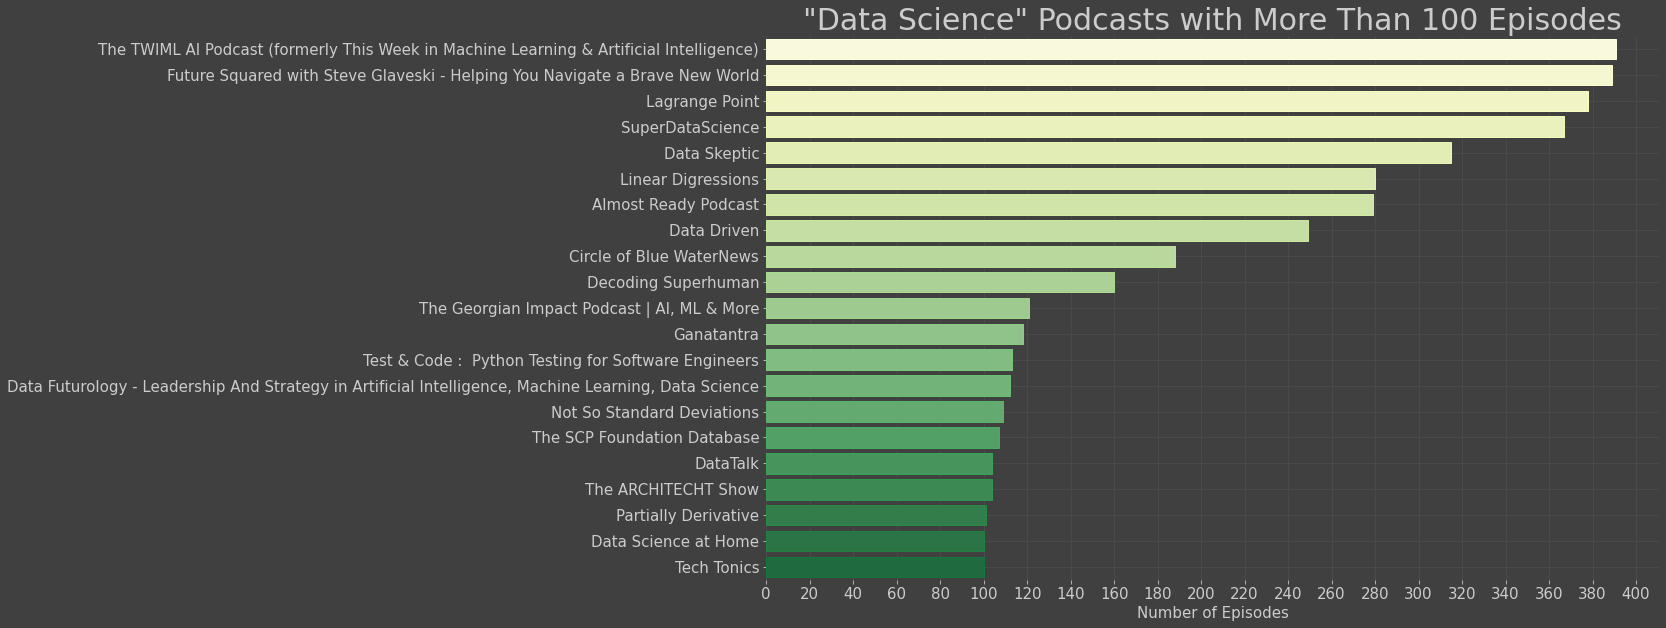

In [36]:

plt.figure(figsize=(16,10))

cmap = sns.color_palette("YlGn", 25)

ax = sns.barplot(x = podcasts_top100.show_name , y = podcasts_top100.index , data = podcasts_top100, orient = 'h', palette=cmap, edgecolor=cmap)

plt.xticks(np.arange(0, 420, 20), size=15)
plt.yticks(size=15)
plt.ylabel('')
plt.title('"Data Science" Podcasts with More Than 100 Episodes',fontsize=30)
plt.xlabel('Number of Episodes', fontsize=15)
plt.grid(color='#4d4d4d')
sns.despine(bottom=True, left=True)

plt.show()

In [37]:
# convert milliseconds to minutes (rounded)

all_episodes['length(ms)'] = round((all_episodes['length(ms)'] / 1000)/60, 0).astype(int)

In [38]:
# change column name to minutes

all_episodes.rename(columns = {'length(ms)':'length(m)'}, inplace = True)

In [39]:
all_episodes

,show_name,episode_id,length(m),date,episode_name,description
0,Towards Data Science,6JOMkSAEY2ynISGe4goxBR,45,2020-05-20,34. Denise Gosnell and Matthias Broecheler - Y...,One great way to get ahead in your career is t...
1,Towards Data Science,4DKphli6kcMKZio8ccKXoW,41,2020-05-13,33. Roland Memisevic - Machines that can see a...,One of the most interesting recent trends in m...
2,Towards Data Science,2HWkpJcfAABzDW2HHVxsAj,44,2020-05-06,32. Bahador Khaleghi - Explainable AI and AI i...,If I were to ask you to explain why you’re rea...
3,Towards Data Science,4Dhzr3lCWzDMe1OrUGjryP,41,2020-04-29,31. Russell Pollari - Building habits and brea...,Most of us want to change our identities. And ...
4,Towards Data Science,0tHoeY76I5WBxcetcugZDZ,43,2020-04-22,30. Interviewing the Medium data science team,"Revenues drop unexpectedly, and management pul..."
...,...,...,...,...,...,...
8539,GI Insights,4RJIceUH0bgulxxlGYGQDz,12,2008-04-24,Hepatitis C Treatment: Grim Fiscal Prospects?,"Guest: Imtiaz Alam, MD Host: David T. Rubi..."
8540,GI Insights,0dAa1KgLqUG04UzBmXgVyR,12,2008-04-24,The Challenges of Caring for Patients with Hep...,"Guest: Imtiaz Alam, MD Host: David T. Rubi..."
8541,GI Insights,7kKwgHQtJDJt98HijlhEYM,13,2008-04-24,Probing the Sustainable Growth Rate Formula,"Guest: Carla Ginsburg, MD, MPH Host: David..."
8542,Journey To The Edge Of Machine Learning,5oYC0rWqgvhlIfUvzE5Sjh,6,2020-04-18,Why is there a SQUARED loss in Linear regression?,"I am reading this new book ""The hundred page m..."


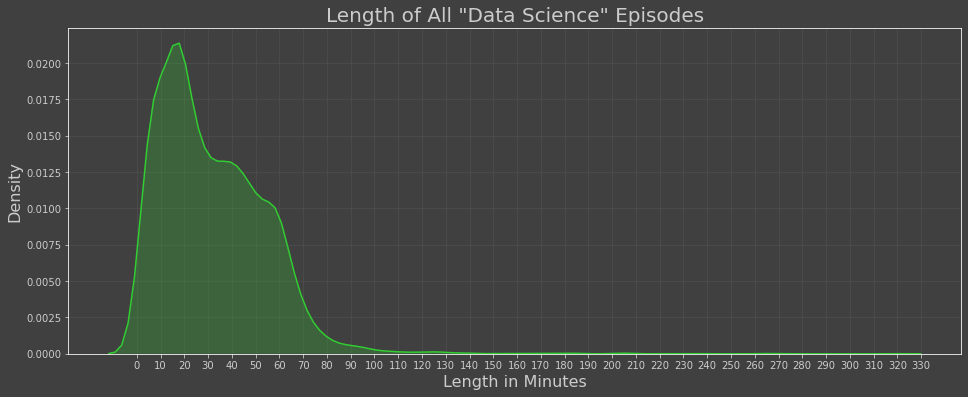

In [40]:
# length distribution

plt.figure(figsize=(16,6))

sns.kdeplot(all_episodes['length(m)'], shade = True, color = 'limegreen', legend = False )

plt.title('Length of All "Data Science" Episodes', fontsize = 20)
plt.xlabel('Length in Minutes', fontsize=16)
plt.xticks(np.arange(0, 340, 10), size=10)
plt.ylabel('Density', fontsize=16)
plt.grid(color='#4d4d4d')
plt.show()

In [41]:
# get the average episode length for each show

show_length = all_episodes.groupby('show_name').mean().sort_values('length(m)', ascending=False)


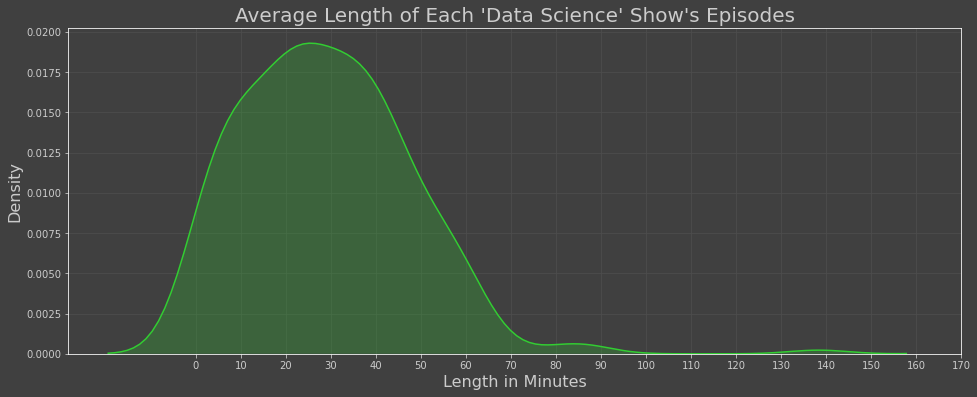

In [42]:
# avg length distribution


plt.figure(figsize=(16,6))

sns.kdeplot(show_length['length(m)'], shade = True, color = 'limegreen', legend= False )

plt.title("Average Length of Each 'Data Science' Show's Episodes", fontsize = 20)
plt.xlabel('Length in Minutes', fontsize=16)
plt.xticks(np.arange(0, 180, 10), size=10)
plt.ylabel('Density', fontsize=16)
plt.grid(color='#4d4d4d')
plt.show()

In [43]:
# slice the top 20

show_length = show_length.iloc[0:20]


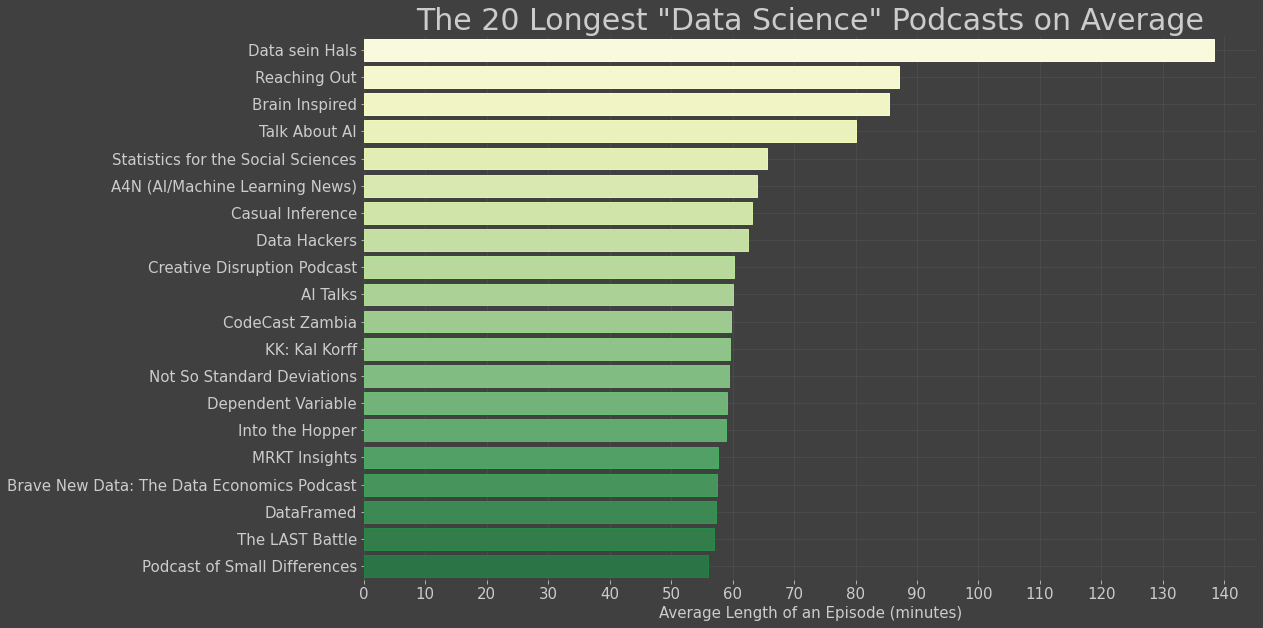

In [44]:
plt.figure(figsize=(16,10))

cmap = sns.color_palette("YlGn", 25)

ax = sns.barplot(x = show_length['length(m)'] , y = show_length.index , data = show_length, orient = 'h', palette=cmap, edgecolor=cmap)

plt.xticks(np.arange(0, 150, 10), size=15)
plt.yticks(size=15)
plt.ylabel('')
plt.title('The 20 Longest "Data Science" Podcasts on Average',fontsize=30)
plt.xlabel('Average Length of an Episode (minutes)', fontsize=15)
plt.grid(color='#4d4d4d')
sns.despine(bottom=True, left=True)

plt.show()

In [45]:
# convert date to datetime

all_episodes['date'] = pd.to_datetime(all_episodes['date'])

In [46]:
# set the index

all_episodes.index = all_episodes['date']

In [56]:
all_episodes = all_episodes[all_episodes['date']> '2012-01-01']

In [57]:
# get the total by month

month_count = all_episodes.resample('M').count()


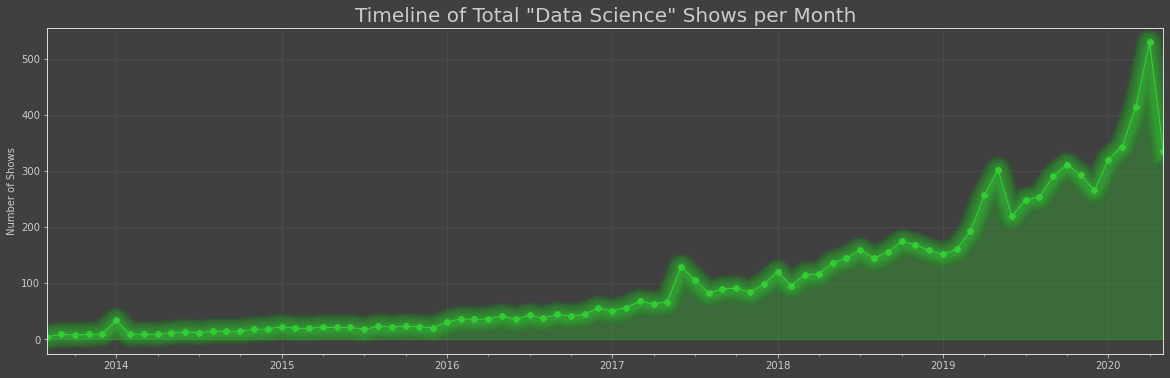

In [58]:


fig, ax1 = plt.subplots(figsize=(20,6))

n_shades = 10
diff_linewidth = 2.5
alpha_value = 0.2 / n_shades


ax1 = month_count.plot(marker='o', y= 'date', ax=ax1, color='limegreen', legend=False)

for n in range(1, n_shades+1):
    month_count.plot(marker='o', linewidth=2+(diff_linewidth*n),
            alpha=alpha_value, ax=ax1, legend=False, color='limegreen')

plt.fill_between(x=month_count.index, y1=month_count['date'].values, y2=[0] * len(month_count), color='limegreen', alpha=0.3)    

plt.ylabel('Number of Shows')
plt.xlabel('')
plt.title('Timeline of Total "Data Science" Shows per Month', fontsize=20)
plt.grid(color='#4d4d4d')

plt.show()


In [59]:
# get the total by year and reset index

year_count = all_episodes.resample('Y').count()
year_count = year_count['show_name']
year_count = year_count.reset_index(drop=True)

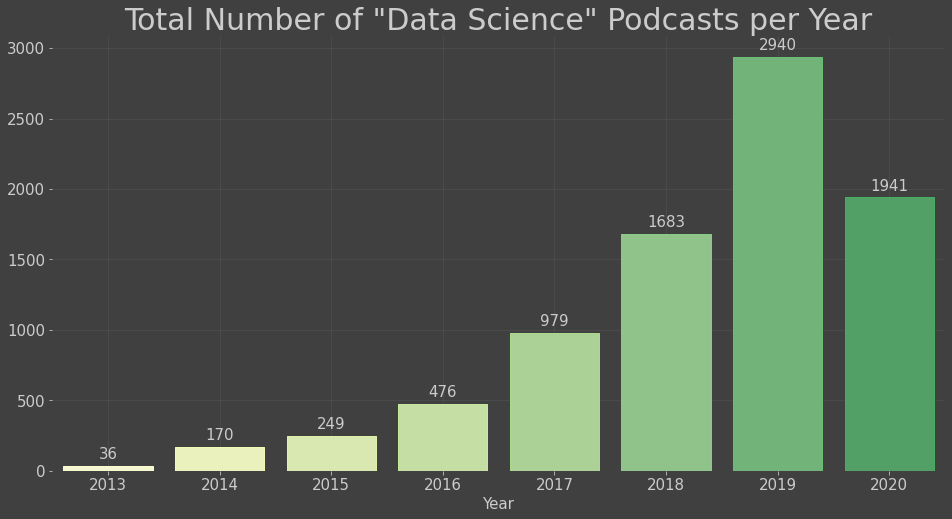

In [61]:

plt.figure(figsize=(16,8))

year = [ 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

cmap = sns.color_palette("YlGn", 12)

g = sns.barplot(x = year , y = year_count.values , data = year_count, orient = 'v', palette=cmap, edgecolor=cmap)

plt.xticks(np.arange(0, 8, 1), size=15)
plt.yticks(size=15)
plt.ylabel('')
plt.title('Total Number of "Data Science" Podcasts per Year',fontsize=30)
plt.xlabel('Year', fontsize=15)
plt.grid(color='#4d4d4d')
sns.despine(bottom=True, left=True)


for index, row in year_count.iteritems():
    g.text(index  , row + 50, row, color='#cccccc', ha="center", fontsize=15)


plt.show()

In [62]:
# get only episodes in 2020

all_episodes_2020 = all_episodes[all_episodes['date'].dt.strftime('%Y') == '2020']

In [63]:
# get total for each day

all_episodes_2020 = all_episodes_2020.resample('D').count()

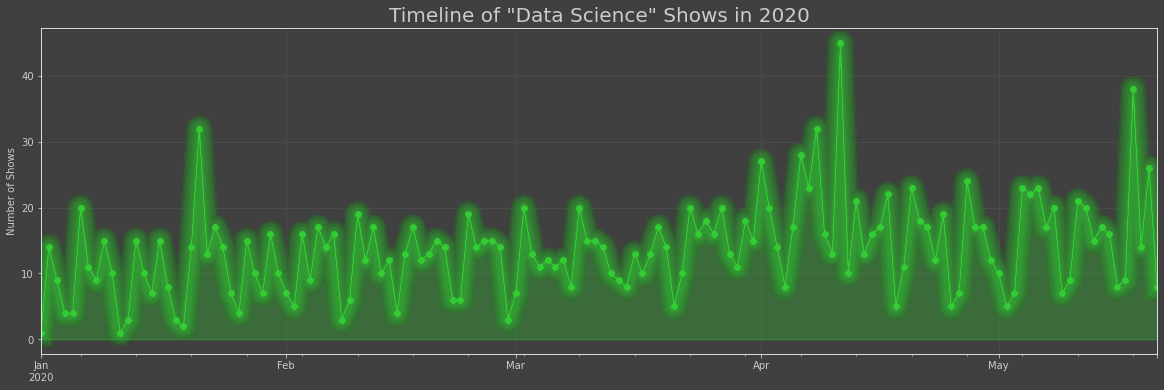

In [64]:


fig, ax1 = plt.subplots(figsize=(20,6))

n_shades = 10
diff_linewidth = 2.5
alpha_value = 0.2 / n_shades


ax1 = all_episodes_2020.plot(marker='o', y= 'date', ax=ax1, color='limegreen', legend=False)

for n in range(1, n_shades+1):
    all_episodes_2020.plot(marker='o', linewidth=2+(diff_linewidth*n),
            alpha=alpha_value, ax=ax1, legend=False, color='limegreen')

plt.fill_between(x=all_episodes_2020.index, y1=all_episodes_2020['date'].values, y2=[0] * len(all_episodes_2020), color='limegreen', alpha=0.3)    

plt.ylabel('Number of Shows')
plt.xlabel('')
plt.title('Timeline of "Data Science" Shows in 2020', fontsize=20)
plt.grid(color='#4d4d4d')

plt.show()

In [65]:
# get total for each day

weekday = all_episodes.resample('D').count()

In [66]:
# set index to day of the week

weekday['weekday'] = weekday.index.day_name()

In [67]:
# get the total number of episode per day and reorder the index

weekday_total = weekday.groupby('weekday').sum()
weekday_total = weekday_total.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

In [68]:
# reset the index

weekday_total = weekday_total.reset_index()

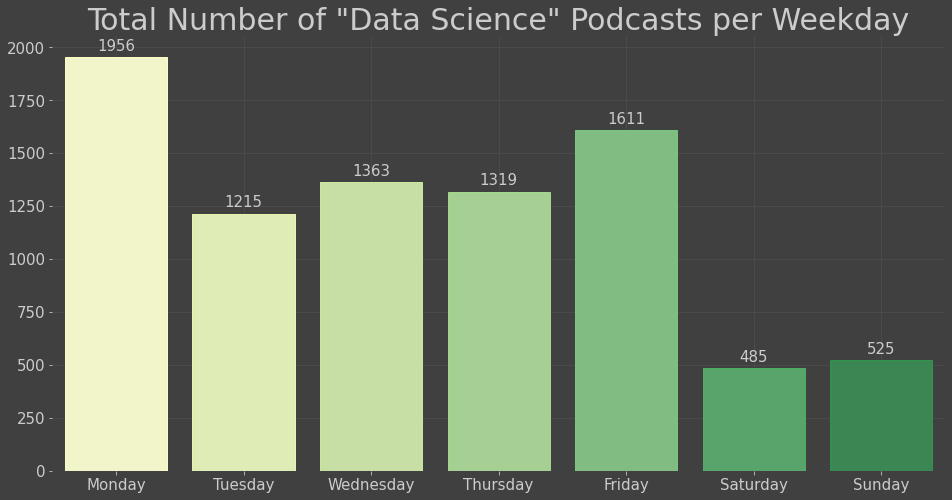

In [69]:

plt.figure(figsize=(16,8))

cmap = sns.color_palette("YlGn", 9)

g = sns.barplot(x = weekday_total.weekday , y = weekday_total['date'].values , data = weekday_total, orient = 'v', palette=cmap, edgecolor=cmap)

plt.xticks(np.arange(0, 7, 1), size=15)
plt.yticks(size=15)
plt.ylabel('')
plt.title('Total Number of "Data Science" Podcasts per Weekday',fontsize=30)
plt.xlabel('')
plt.grid(color='#4d4d4d')
sns.despine(bottom=True, left=True)

for index, row in weekday_total['date'].iteritems():
    g.text(index  , row + 30, row, color='#cccccc', ha="center", fontsize=15)

plt.show()

In [70]:
# get the average number of shows per weekday and reorder 

weekday_avg = weekday.groupby('weekday').mean()
weekday_avg = weekday_avg.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

In [71]:
# reset the index

weekday_avg = weekday_avg.reset_index()

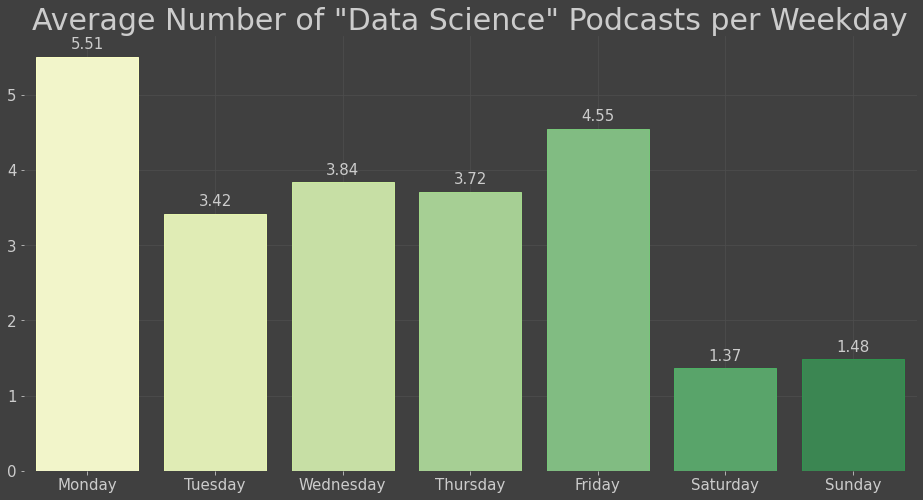

In [72]:

plt.figure(figsize=(16,8))

cmap = sns.color_palette("YlGn", 9)

g = sns.barplot(x = weekday_avg.weekday , y = weekday_avg['date'].values , data = weekday_avg, orient = 'v', palette=cmap, edgecolor=cmap)

plt.xticks(np.arange(0, 7, 1), size=15)
plt.yticks(size=15)
plt.ylabel('')
plt.title('Average Number of "Data Science" Podcasts per Weekday',fontsize=30)
plt.xlabel('')
plt.grid(color='#4d4d4d')
sns.despine(bottom=True, left=True)

for index, row in weekday_avg['date'].iteritems():
    g.text(index  , row + 0.1, round(row, 2), color='#cccccc', ha="center", fontsize=15)

plt.show()

# Text Generation

In [73]:
# create wordbank from descriptions

wordbank = all_episodes['description'].unique()

wordbank 

array(['One great way to get ahead in your career is to make good bets on what technologies are going to become important in the future, and to invest time in learning them. If that sounds like something you want to do, then you should definitely be paying attention to graph databases. Graph databases aren’t exactly new, but they’ve become increasingly important as graph data (data that describe interconnected networks of things) has become more widely available than ever. Social media, supply chains, mobile device tracking, economics and many more fields are generating more graph data than ever before, and buried in these datasets are potential solutions for many of our biggest problems. That’s why I was so excited to speak with Denise Gosnell and Matthias Broecheler, respectively the Chief Data Officer and Chief Technologist at DataStax, a company specialized in solving data engineering problems for enterprises. Apart from their extensive experience working with graph databases at Da

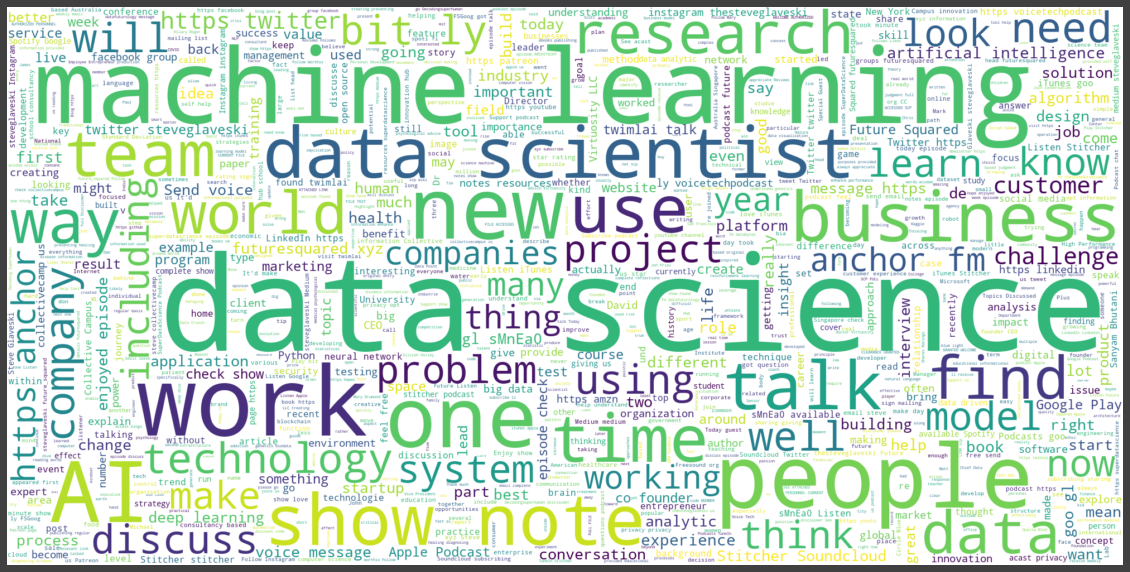

In [74]:
# build a word cloud

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=1000, width=2000, height=1000).generate(' '.join(str(word) for word in wordbank))

# display the word cloud

fig = plt.figure()
fig.set_figwidth(20) # set width
fig.set_figheight(20) # set height

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Image opened and saved!


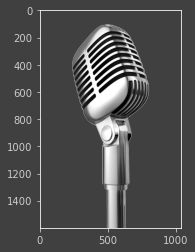

In [75]:
# open image (just make sure it's in your working directory) and save mask to book

mic = np.array(PIL.Image.open('mic.png'))

imshow(mic)

print('Image opened and saved!')

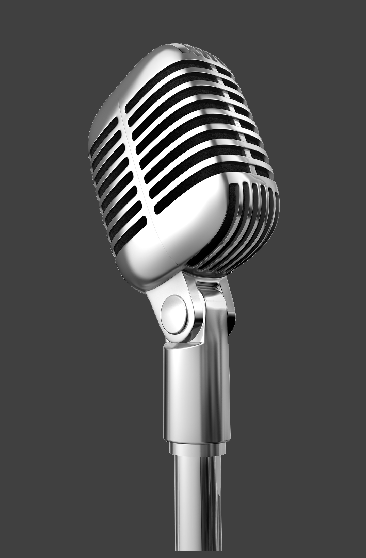

In [76]:
# display mask image

fig = plt.figure()
fig.set_figwidth(10) # set width
fig.set_figheight(10) # set height

plt.imshow(mic, cmap=plt.cm.gray, interpolation='None')
plt.axis('off')
plt.show()

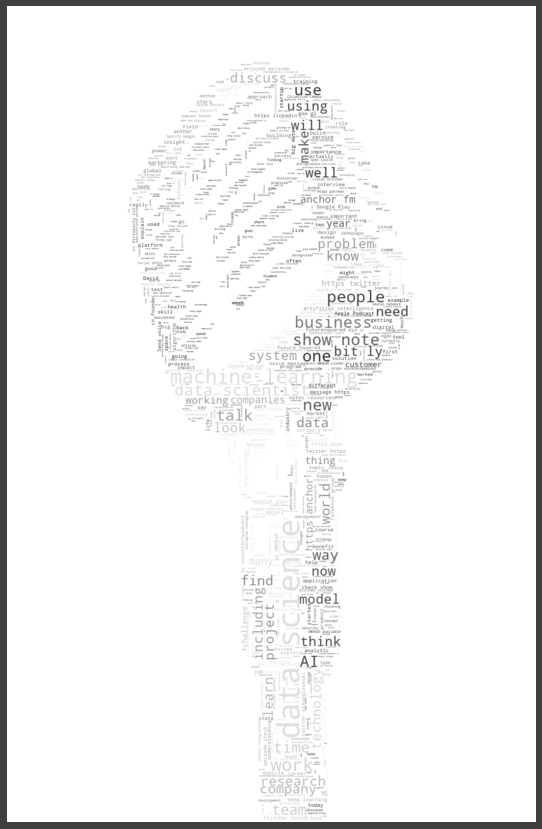

In [77]:
# create a beautiful wordcloud

stopwords = set(STOPWORDS)

wc = WordCloud(background_color="white", max_words=3000, mask=mic,
               stopwords=stopwords, max_font_size=60, random_state=42)
# generate word cloud
wc.generate(' '.join(wordbank))

# create coloring from image
image_colors = ImageColorGenerator(mic)

# show
plt.figure(figsize=(15, 15))

# recolor wordcloud and show
# we could also give color_func=image_colors directly in the constructor
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")

plt.axis('off')

plt.show()

In [78]:
# format text to lowercase and remove any numbers, reset the index

all_episodes = all_episodes.reset_index(drop=True)

text = all_episodes['description'].str.lower()
text = text.str.replace('\d+', '')
text = text.astype('str')
text

0       one great way to get ahead in your career is t...
1       one of the most interesting recent trends in m...
2       if i were to ask you to explain why you’re rea...
3       most of us want to change our identities. and ...
4       revenues drop unexpectedly, and management pul...
                              ...                        
8469         host dr. barry mennen welcomes dr. ryan s...
8470      host: jay goldstein, md   guest: douglas dro...
8471         host dr. jay goldstein welcomes dr. sunan...
8472    i am reading this new book "the hundred page m...
8473    welcome to the what supp show, a podcast dedic...
Name: description, Length: 8474, dtype: object

In [79]:
# create 5 models

text_model_1 = markovify.NewlineText(text, state_size = 3)
text_model_2 = markovify.NewlineText(text, state_size = 3)
text_model_3 = markovify.NewlineText(text, state_size = 3)
text_model_4 = markovify.NewlineText(text, state_size = 3)
text_model_5 = markovify.NewlineText(text, state_size = 3)

In [80]:
# create model ensemble and generate 10 new episode descriptions

model_combo = markovify.combine([ text_model_1, text_model_2, text_model_3, text_model_4, text_model_5 ], [ 1, 1, 1, 1, 1])

# Print randomly-generated sentences using the built model

for idx, i in enumerate(range(10)):
    print('(',idx+1,')','   ', model_combo.make_sentence(tries=10000, max_overlap_ratio = 0.2, test_output= True))

( 1 )     a look into his presentation, discussing today’s ml landscape. the gap between business and technology, key steps on how to leverage influencers to build brand awareness the power of thought, mindfulness, practice, and how even data scientists need to look at how he combines neural networks with starting, stopping, and resuming training. we are going to considered are strictly called artificial neural networks, and deep learning, and graph networks.build your own graph networks: open source graph network library. 
( 2 )     in this episode of the uplow’d to discuss spatial analysis. we’ll learn about ai in the enterprise, and i think you’ll enjoy it. the notes for this episode can be found at twimlai.com/talk/. thanks to qualcomm for their sponsorship of today's episode! check out their demos. like the content you hear? support the creation of #datafemme’s content by becoming a patron on patreon at www.patreon.com/datafemme. 
( 3 )     in this episode, we talk with someone wh